In [0]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import json

In [2]:
!ls drive/My\ Drive/yelp

business.json				 review.json
checkin.json				 tip.json
Dataset_Challenge_Dataset_Agreement.pdf  user.json
photo.json				 Yelp_Dataset_Challenge_Round_13.pdf
restaurant_categories.csv


# Business

In [0]:
business = pd.read_json("drive/My Drive/yelp/business.json", lines=True)

In [4]:
business.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,1SWheh84yJXfytovILXOAQ,Arizona Biltmore Golf Club,2818 E Camino Acequia Drive,Phoenix,AZ,85016,33.522143,-112.018481,3.0,5,0,{'GoodForKids': 'False'},"Golf, Active Life",None
1,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,L5R 3E7,43.605499,-79.652289,2.5,128,1,"{'RestaurantsReservations': 'True', 'GoodForMe...","Specialty Food, Restaurants, Dim Sum, Imported...","{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W..."
2,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,"10110 Johnston Rd, Ste 15",Charlotte,NC,28210,35.092564,-80.859132,4.0,170,1,"{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...","Sushi Bars, Restaurants, Japanese","{'Monday': '17:30-21:30', 'Wednesday': '17:30-..."
3,xvX2CttrVhyG2z1dFg_0xw,Farmers Insurance - Paul Lorenz,"15655 W Roosevelt St, Ste 237",Goodyear,AZ,85338,33.455613,-112.395596,5.0,3,1,None,"Insurance, Financial Services","{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ..."
4,HhyxOkGAM07SRYtlQ4wMFQ,Queen City Plumbing,"4209 Stuart Andrew Blvd, Ste F",Charlotte,NC,28217,35.190012,-80.887223,4.0,4,1,"{'BusinessAcceptsBitcoin': 'False', 'ByAppoint...","Plumbing, Shopping, Local Services, Home Servi...","{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ..."


In [5]:
len(business)

192609

In [6]:
# Count businesses with NA
for col in business.columns:
  print("{0} has {1} rows with NA".format(col, business[col].isnull().values.ravel().sum()))

business_id has 0 rows with NA
name has 0 rows with NA
address has 0 rows with NA
city has 0 rows with NA
state has 0 rows with NA
postal_code has 0 rows with NA
latitude has 0 rows with NA
longitude has 0 rows with NA
stars has 0 rows with NA
review_count has 0 rows with NA
is_open has 0 rows with NA
attributes has 28836 rows with NA
categories has 482 rows with NA
hours has 44830 rows with NA


In [0]:
# Drop businesses with NA categories
business = business.loc[business['categories'].isna() == False]

In [0]:
# Categories within food
restaurant_cats = set(pd.read_csv("drive/My Drive/yelp/restaurant_categories.csv",header=None).values.squeeze().tolist())

In [0]:
def is_restaurant(cat):
  """Check if given categories contain restaurant
  """
  for c in cat.split(","):
    if c.strip().lower() in restaurant_cats:
      return True
  return False

In [0]:
# Restaurant indicator
business['restaurant'] = business['categories'].apply(lambda x : 1 if is_restaurant(x) else 0)

In [0]:
# Restaurant only
restaurant = business.loc[business['restaurant'] == 1].drop('restaurant', axis=1)

In [12]:
restaurant['city'].value_counts(dropna=False)

Toronto            7964
Las Vegas          6450
Phoenix            3999
Montréal           3784
Calgary            2912
                   ... 
North Braddock        1
Mont St-hilaire       1
Varennes              1
East McKeesport       1
Ange-Gardien          1
Name: city, Length: 782, dtype: int64

In [0]:
# Toronto restaurant only
restaurant_TO = restaurant.loc[restaurant['city'] == 'Toronto']

In [14]:
restaurant_TO.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
29,NDuUMJfrWk52RA-H-OtrpA,Bolt Fresh Bar,1170 Queen Street W,Toronto,ON,M6J 1J5,43.642889,-79.425429,3.0,57,1,"{'WiFi': 'u'no'', 'BikeParking': 'True', 'Rest...","Juice Bars & Smoothies, Food, Restaurants, Fas...","{'Monday': '8:0-21:0', 'Tuesday': '8:0-21:0', ..."
32,SP_YXIEwkFPPl_9anCYmpQ,The Steady Cafe & Bar,1051 Bloor Street W,Toronto,ON,M6H 1M4,43.660494,-79.432099,3.5,29,0,"{'BusinessParking': '{'garage': False, 'street...","Restaurants, Nightlife, Breakfast & Brunch, Ve...","{'Tuesday': '9:0-18:0', 'Wednesday': '9:0-18:0..."
50,mlHC2XcU9Bows6cnYEmRgg,Mad Crush Wine Bar,582 College Street,Toronto,ON,M6G 1B3,43.655420,-79.413352,4.0,9,0,"{'Alcohol': 'u'full_bar'', 'Caters': 'False', ...","Restaurants, Breakfast & Brunch, Bars, Modern ...","{'Thursday': '18:0-2:0', 'Friday': '18:0-2:0',..."
83,RFbMVekR8lU9tPJ8sWrwHg,Tavolino,619 Mount Pleasant Road,Toronto,ON,M4S 2M5,43.704229,-79.388230,4.0,18,1,"{'RestaurantsPriceRange2': '2', 'HasTV': 'Fals...","Italian, Restaurants",None
96,NPHZkn1e-tSJAbo8Zm9rYw,Burrito Bandidos,1614 Queen Street E,Toronto,ON,M4L 1G4,43.666181,-79.316468,3.5,43,1,"{'RestaurantsGoodForGroups': 'True', 'Restaura...","Tex-Mex, Mexican, Restaurants","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'..."


In [15]:
restaurant_TO['review_count'].value_counts()

3       642
4       465
5       374
6       294
7       284
       ... 
218       1
795       1
1045      1
897       1
1397      1
Name: review_count, Length: 397, dtype: int64

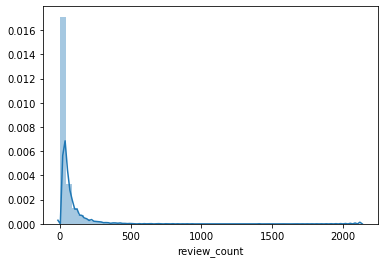

In [16]:
sns.distplot(restaurant_TO['review_count'])

In [0]:
restaurant_TO_10plus = restaurant_TO.loc[restaurant_TO['review_count'] >= 10]

In [18]:
len(restaurant_TO_10plus)

5406

In [19]:
restaurant_TO_10plus.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
29,NDuUMJfrWk52RA-H-OtrpA,Bolt Fresh Bar,1170 Queen Street W,Toronto,ON,M6J 1J5,43.642889,-79.425429,3.0,57,1,"{'WiFi': 'u'no'', 'BikeParking': 'True', 'Rest...","Juice Bars & Smoothies, Food, Restaurants, Fas...","{'Monday': '8:0-21:0', 'Tuesday': '8:0-21:0', ..."
32,SP_YXIEwkFPPl_9anCYmpQ,The Steady Cafe & Bar,1051 Bloor Street W,Toronto,ON,M6H 1M4,43.660494,-79.432099,3.5,29,0,"{'BusinessParking': '{'garage': False, 'street...","Restaurants, Nightlife, Breakfast & Brunch, Ve...","{'Tuesday': '9:0-18:0', 'Wednesday': '9:0-18:0..."
83,RFbMVekR8lU9tPJ8sWrwHg,Tavolino,619 Mount Pleasant Road,Toronto,ON,M4S 2M5,43.704229,-79.388230,4.0,18,1,"{'RestaurantsPriceRange2': '2', 'HasTV': 'Fals...","Italian, Restaurants",None
96,NPHZkn1e-tSJAbo8Zm9rYw,Burrito Bandidos,1614 Queen Street E,Toronto,ON,M4L 1G4,43.666181,-79.316468,3.5,43,1,"{'RestaurantsGoodForGroups': 'True', 'Restaura...","Tex-Mex, Mexican, Restaurants","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'..."
107,jtlAfuINMCYVFpjwMgy2jw,Medium Rare,5241 Dundas Street W,Toronto,ON,M9B 1A5,43.638879,-79.537632,4.0,22,0,"{'RestaurantsPriceRange2': '3', 'BikeParking':...","Grocery, Restaurants, Steakhouses, Butcher, Food","{'Tuesday': '9:0-18:0', 'Wednesday': '9:0-18:0..."


In [20]:
restaurant_TO_10plus['is_open'].value_counts()

1    3761
0    1645
Name: is_open, dtype: int64

In [0]:
restaurant_final = restaurant_TO_10plus[['business_id', 'name', 'stars']]
restaurant_final = restaurant_final.reset_index(drop=True)
restaurant_final = restaurant_final.rename(columns={'name':'business_name', 'stars':'business_stars'})

In [22]:
restaurant_final.head()

,business_id,business_name,business_stars
0,NDuUMJfrWk52RA-H-OtrpA,Bolt Fresh Bar,3.0
1,SP_YXIEwkFPPl_9anCYmpQ,The Steady Cafe & Bar,3.5
2,RFbMVekR8lU9tPJ8sWrwHg,Tavolino,4.0
3,NPHZkn1e-tSJAbo8Zm9rYw,Burrito Bandidos,3.5
4,jtlAfuINMCYVFpjwMgy2jw,Medium Rare,4.0


In [23]:
len(restaurant_final)

5406

In [24]:
restaurant_final['business_name'].value_counts()

McDonald's                         31
Aroma Espresso Bar                 20
Pizzaiolo                          20
Swiss Chalet Rotisserie & Grill    18
Starbucks                          17
                                   ..
District                            1
Roywoods Ossington                  1
Ricarda's                           1
Braiseryy                           1
Hollandaise Diner                   1
Name: business_name, Length: 4659, dtype: int64

In [25]:
restaurant_final.isnull().sum()

business_id       0
business_name     0
business_stars    0
dtype: int64

# Review

In [0]:
review = []

with open('drive/My Drive/yelp/review.json') as file:
  for line in file:
      review.append(json.loads(line))

review = pd.DataFrame(review)

In [27]:
len(review)

6685900

In [28]:
review.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,Q1sbwvVQXV2734tPgoKj4Q,hG7b0MtEbXx5QzbzE6C_VA,ujmEBvifdJM6h6RLv4wQIg,1.0,6,1,0,Total bill for this horrible service? Over $8G...,2013-05-07 04:34:36
1,GJXCdrto3ASJOqKeVWPi6Q,yXQM5uF2jS6es16SJzNHfg,NZnhc2sEQy3RmzKTZnqtwQ,5.0,0,0,0,I *adore* Travis at the Hard Rock's new Kelly ...,2017-01-14 21:30:33
2,2TzJjDVDEuAW6MR5Vuc1ug,n6-Gk65cPZL6Uz8qRm3NYw,WTqjgwHlXbSFevF32_DJVw,5.0,3,0,0,I have to say that this office really has it t...,2016-11-09 20:09:03
3,yi0R0Ugj_xUx_Nek0-_Qig,dacAIZ6fTM6mqwW5uxkskg,ikCg8xy5JIg_NGPx-MSIDA,5.0,0,0,0,Went in for a lunch. Steak sandwich was delici...,2018-01-09 20:56:38
4,11a8sVPMUFtaC7_ABRkmtw,ssoyf2_x0EQMed6fgHeMyQ,b1b1eb3uo-w561D0ZfCEiQ,1.0,7,0,0,Today was my second out of three sessions I ha...,2018-01-30 23:07:38


In [0]:
review_final = review[['review_id', 'business_id', 'stars', 'text']]
review_final = review_final.rename(columns={'stars':'review_stars', 'text':'review_text'})

In [30]:
review_final.head()

,review_id,business_id,review_stars,review_text
0,Q1sbwvVQXV2734tPgoKj4Q,ujmEBvifdJM6h6RLv4wQIg,1.0,Total bill for this horrible service? Over $8G...
1,GJXCdrto3ASJOqKeVWPi6Q,NZnhc2sEQy3RmzKTZnqtwQ,5.0,I *adore* Travis at the Hard Rock's new Kelly ...
2,2TzJjDVDEuAW6MR5Vuc1ug,WTqjgwHlXbSFevF32_DJVw,5.0,I have to say that this office really has it t...
3,yi0R0Ugj_xUx_Nek0-_Qig,ikCg8xy5JIg_NGPx-MSIDA,5.0,Went in for a lunch. Steak sandwich was delici...
4,11a8sVPMUFtaC7_ABRkmtw,b1b1eb3uo-w561D0ZfCEiQ,1.0,Today was my second out of three sessions I ha...


# Merge

In [0]:
dataset = restaurant_final.merge(review_final, how='left', on='business_id', sort=True)

In [32]:
dataset.head()

,business_id,business_name,business_stars,review_id,review_stars,review_text
0,--DaPTJW3-tB1vP-PfdTEg,Sunnyside Grill,3.5,DhjYsxxGlGa2Y4EaJV99XA,4.0,My sister and in laws were in town and we want...
1,--DaPTJW3-tB1vP-PfdTEg,Sunnyside Grill,3.5,5sg8KeTfTiLFC0hx75Xt9g,4.0,We really enjoy this breakfast restaurant in t...
2,--DaPTJW3-tB1vP-PfdTEg,Sunnyside Grill,3.5,-DcBOwz6gRTW0iQBSdJX3A,4.0,"Just tried this breakfast joint, didn't want t..."
3,--DaPTJW3-tB1vP-PfdTEg,Sunnyside Grill,3.5,WxvsMJUo8RVvuS_5rXgEVg,4.0,Stopped in on a weekday while in Toronto just ...
4,--DaPTJW3-tB1vP-PfdTEg,Sunnyside Grill,3.5,0TBECKZ08JmnPYw7zxRIsg,2.0,Not great. Ordered the eggs florentine with ho...


In [33]:
len(dataset)

362554

# Checks

In [34]:
dataset.isna().sum()

business_id       0
business_name     0
business_stars    0
review_id         0
review_stars      0
review_text       0
dtype: int64

In [35]:
dataset.isnull().sum()

business_id       0
business_name     0
business_stars    0
review_id         0
review_stars      0
review_text       0
dtype: int64

In [36]:
avg_rating = pd.pivot_table(dataset, values='review_stars', index=['business_id'], columns=['business_stars'], aggfunc='mean')
avg_rating

business_stars,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0
business_id,,,,,,,,,
--DaPTJW3-tB1vP-PfdTEg,NaN,NaN,NaN,NaN,NaN,3.714286,NaN,NaN,NaN
--SrzpvFLwP_YFwB_Cetow,NaN,NaN,NaN,NaN,NaN,3.500000,NaN,NaN,NaN
-0NhdsDJsdarxyDPR523ZQ,NaN,NaN,NaN,NaN,2.909091,NaN,NaN,NaN,NaN
-0aOudcaAyac0VJbMX-L1g,NaN,NaN,NaN,NaN,3.133333,NaN,NaN,NaN,NaN
-2EAyppKR_2xuLyvJZEbRQ,NaN,NaN,NaN,2.263158,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
zy_NHTqtfSrfTGGPoqy4Mw,NaN,NaN,NaN,NaN,NaN,3.280000,NaN,NaN,NaN
zyw5DjrRks7a8OhmBsgCQQ,NaN,NaN,NaN,NaN,3.083333,NaN,NaN,NaN,NaN
zz3CqZhNx2rQ_Yp6zHze-A,NaN,NaN,NaN,NaN,2.978723,NaN,NaN,NaN,NaN


# Assign Sentiment

In [0]:
binary = False

In [0]:
dataset = dataset.loc[:,['review_stars', 'review_text']]

In [0]:
# Function to assign sentiment
def get_sentiment(n, binary=True):
    assert n >= 1 and n <= 5 and type(n) == int
    
    if binary:
      if n == 1 or n == 2:
          return 0
      elif n == 3:
          return -1
      else:
          return 1
    
    else:
      return int(n)

In [40]:
dataset.head()

,review_stars,review_text
0,4.0,My sister and in laws were in town and we want...
1,4.0,We really enjoy this breakfast restaurant in t...
2,4.0,"Just tried this breakfast joint, didn't want t..."
3,4.0,Stopped in on a weekday while in Toronto just ...
4,2.0,Not great. Ordered the eggs florentine with ho...


In [0]:
dataset = dataset.astype({'review_stars': 'int32'})

In [0]:
# Assignment
dataset['sentiment'] = dataset['review_stars'].apply(lambda x : get_sentiment(x, binary = binary))

In [43]:
dataset['sentiment'].value_counts()

4    118792
5    106918
3     65154
2     37520
1     34170
Name: sentiment, dtype: int64

In [0]:
# Drop neutral reviews
# dataset = dataset.loc[dataset['sentiment'] != -1]

In [0]:
dataset = dataset.reset_index(drop=True)

In [0]:
# Remove stars column
dataset = dataset.drop('review_stars', axis=1)
dataset = dataset.rename(columns={'review_text':'review'})

In [46]:
dataset.head()

,review,sentiment
0,My sister and in laws were in town and we want...,4
1,We really enjoy this breakfast restaurant in t...,4
2,"Just tried this breakfast joint, didn't want t...",4
3,Stopped in on a weekday while in Toronto just ...,4
4,Not great. Ordered the eggs florentine with ho...,2


In [47]:
dataset.describe()

,sentiment
count,362554.000000
mean,3.625474
std,1.263539
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


# Remove Regular Expressions

In [0]:
# import re

# EMOJI_PATTERNS = re.compile("["
#                             u"\U0001F600-\U0001F64F"  # emoticons
#                             u"\U0001F300-\U0001F5FF"  # symbols & pictographs
#                             u"\U0001F680-\U0001F6FF"  # transport & map symbols
#                             u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
#                             "]+", flags=re.UNICODE)
# REPLACE_NO_SPACE = re.compile("[.;:!\'?,\"()\[\]]")
# REPLACE_WITH_SPACE = re.compile("(<br\s*/><br\s*/>)|(\-)|(\/)|\n")

# def remove_regs(review):
#     r = EMOJI_PATTERNS.sub(" ", review)
#     r = REPLACE_NO_SPACE.sub(" ", r)
#     r = REPLACE_WITH_SPACE.sub(" ", r)
#     return r

In [0]:
# dataset['review'] = dataset['review'].apply(lambda r : remove_regs(r.lower()))

In [0]:
# dataset.head()

# Train/Test Split

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
train, test = train_test_split(dataset, train_size=0.75)

In [50]:
train.describe()

,sentiment
count,271915.000000
mean,3.625935
std,1.263561
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


In [51]:
test.describe()

,sentiment
count,90639.000000
mean,3.624091
std,1.263476
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


# Export

In [0]:
if binary:
  train.to_json('drive/My Drive/yelp_processed/yelp_train_binary.json', orient='records')
  test.to_json('drive/My Drive/yelp_processed/yelp_test_binary.json', orient='records')
  
else:
  train.to_json('drive/My Drive/yelp_processed/yelp_train.json', orient='records')
  test.to_json('drive/My Drive/yelp_processed/yelp_test.json', orient='records')